In [1]:
pip install wordcloud 

Note: you may need to restart the kernel to use updated packages.


In [22]:
from ckiptagger import construct_dictionary, WS, POS, NER
import json

from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
# 載入模型
# WS、POS、NER，分別是斷詞、詞性標記、命名實體識別
ws = WS("./data")
pos = POS("./data")
# ner = NER("./data")

C:\Users\Tibame_T14\anaconda3\lib\site-packages\ckiptagger\model_ws.py:106: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.LSTMCell(hidden_d, name=name)
C:\Users\Tibame_T14\anaconda3\lib\site-packages\keras\layers\legacy_rnn\rnn_cell_impl.py:984: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  self._kernel = self.add_variable(
C:\Users\Tibame_T14\anaconda3\lib\site-packages\keras\layers\legacy_rnn\rnn_cell_impl.py:993: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  self._bias = self.add_variable(
C:\Users\Tibame_T14\anaconda3\lib\site-packages\ckiptagger\model_pos.py:56: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and w

In [4]:
# 載入資料
with open('./youtube/醫療保健text.json') as f:
    data = json.loads(f.read())

In [11]:
# 直接原資料處理，實際狀況上需要先整理好在做
alltext = []
# 取10月之後的資料
for file in data.values():
    for name, texts in file.items():
        if int(name.split('_')[-1].split('.')[0]) >= int("20211001"):
            word_sentence_list = ws(list(texts))
            pos_sentence_list = pos(word_sentence_list)
            for i in range(len(texts)):
                for word in zip(word_sentence_list[i], pos_sentence_list[i]):
                    alltext.append(word)
        else:
            continue

In [14]:
len(alltext)

177297

In [26]:
seg_counter = Counter(alltext)
seg_counter

Counter({('大家', 'Nh'): 279,
         ('平常', 'Nd'): 55,
         ('回家', 'VA'): 12,
         ('過年', 'VA'): 1,
         ('三姑六婆', 'Na'): 1,
         ('七叔東', 'Nb'): 1,
         ('最', 'Dfa'): 358,
         ('常', 'D'): 68,
         ('問', 'VE'): 101,
         ('你', 'Nh'): 4105,
         ('什麼', 'Nep'): 754,
         ('第二', 'Neu'): 113,
         ('名', 'Nf'): 26,
         ('就', 'D'): 3653,
         ('是', 'SHI'): 6200,
         ('啊', 'T'): 893,
         ('現在', 'Nd'): 290,
         ('在', 'P'): 1504,
         ('哪裡', 'Ncd'): 38,
         ('上班', 'VA'): 13,
         ('薪水', 'Na'): 3,
         ('福利', 'Na'): 2,
         ('好不好', 'VH'): 6,
         ('第一', 'Neu'): 126,
         ('有', 'V_2'): 2697,
         ('沒', 'D'): 136,
         ('男朋友', 'Na'): 13,
         ('怎麼', 'VH'): 16,
         ('時候', 'Na'): 725,
         ('結婚', 'VA'): 17,
         ('生', 'VC'): 86,
         ('小孩', 'Na'): 43,
         ('東西', 'Na'): 288,
         ('換七八糟', 'VA'): 1,
         ('還', 'D'): 612,
         ('當', 'P'): 103,
         ('爸', 'Na'

In [143]:
# 不管詞性
clouddict={}
for x, y in seg_counter.items():
    if x[0] in clouddict:
        clouddict[x[0]] += y
    else:
        clouddict[x[0]] = y
clouddict

{'大家': 279,
 '平常': 59,
 '回家': 12,
 '過年': 1,
 '三姑六婆': 1,
 '七叔東': 1,
 '最': 358,
 '常': 68,
 '問': 101,
 '你': 4105,
 '什麼': 754,
 '第二': 113,
 '名': 28,
 '就': 3704,
 '是': 6200,
 '啊': 963,
 '現在': 290,
 '在': 1526,
 '哪裡': 38,
 '上班': 13,
 '薪水': 3,
 '福利': 2,
 '好不好': 6,
 '第一': 126,
 '有': 2738,
 '沒': 211,
 '男朋友': 13,
 '怎麼': 205,
 '時候': 725,
 '結婚': 17,
 '生': 91,
 '小孩': 43,
 '東西': 288,
 '換七八糟': 1,
 '還': 626,
 '當': 147,
 '爸': 14,
 '時間': 174,
 '到': 432,
 '該': 70,
 '做': 514,
 '吧': 115,
 '我': 2369,
 '老大': 84,
 '你們': 288,
 '不': 1751,
 '適婚': 1,
 '年齡': 16,
 '一點點': 85,
 '網購': 1,
 '知道': 326,
 '不覺': 2,
 '所以': 914,
 '這': 3087,
 '一': 2591,
 '集': 23,
 '我們': 1640,
 '一起': 67,
 '來': 630,
 '聊': 19,
 '之前': 132,
 '幾': 117,
 '件': 79,
 '事情': 167,
 '必須': 48,
 '要': 1384,
 '想': 280,
 '清楚': 50,
 '如果': 690,
 '這些': 313,
 '連': 22,
 '都': 1325,
 '這樣': 480,
 '絕對': 61,
 '會': 2354,
 '超高': 2,
 '機率': 19,
 '走向': 3,
 '離婚': 1,
 '不管': 89,
 '單身': 18,
 '辦': 11,
 '還是': 434,
 '關係': 124,
 '一言難盡': 1,
 '聽聽': 1,
 '怎麼說': 6,
 '婚前': 8,
 '想清楚': 6,
 '現況

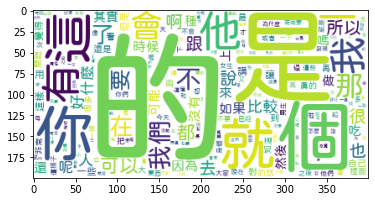

In [133]:
# 格式設定
font_path = 'jf-openhuninn-1.1.ttf' # 設定字體格式

wc = WordCloud(background_color='white', font_path=font_path, random_state=1)
# 生成文字雲
wc.generate_from_frequencies(clouddict)
plt.imshow(wc)

In [144]:
# 使用停用字(先以網路找到的做使用)
with open('stopword.txt', encoding='utf-8') as f:
    stopwords = f.read().split('\n')
clouddict_stop = {}
for x, y in seg_counter.items():
    if x[0] not in stopwords:
        if x[0] in clouddict_stop:
            clouddict_stop[x[0]] += y
        else:
            clouddict_stop[x[0]] = y
    else:
        pass
clouddict_stop

{'平常': 59,
 '回家': 12,
 '過年': 1,
 '三姑六婆': 1,
 '七叔東': 1,
 '問': 101,
 '名': 28,
 '哪裡': 38,
 '上班': 13,
 '薪水': 3,
 '福利': 2,
 '好不好': 6,
 '第一': 126,
 '男朋友': 13,
 '結婚': 17,
 '生': 91,
 '小孩': 43,
 '東西': 288,
 '換七八糟': 1,
 '爸': 14,
 '時間': 174,
 '做': 514,
 '適婚': 1,
 '年齡': 16,
 '一點點': 85,
 '網購': 1,
 '不覺': 2,
 '集': 23,
 '聊': 19,
 '件': 79,
 '事情': 167,
 '想': 280,
 '如果': 690,
 '超高': 2,
 '機率': 19,
 '走向': 3,
 '離婚': 1,
 '單身': 18,
 '辦': 11,
 '關係': 124,
 '一言難盡': 1,
 '聽聽': 1,
 '怎麼說': 6,
 '婚前': 8,
 '想清楚': 6,
 '現況價': 1,
 '未來': 20,
 '住': 18,
 '信義區': 1,
 '有沒有': 101,
 '開': 40,
 '封閉': 1,
 '幻想': 5,
 '讀': 9,
 '角佈': 1,
 '面膜': 7,
 '逛街': 1,
 '吃': 626,
 '蛋糕': 22,
 '說': 1045,
 '愛': 75,
 '蘋現況': 1,
 '假面': 1,
 '超級': 28,
 '危險': 14,
 '眼前': 1,
 '男人': 7,
 '一生': 17,
 '高高低低': 1,
 '買': 114,
 '股票': 1,
 '阿公司': 1,
 '體質': 27,
 '股價': 3,
 '高': 219,
 '爽': 13,
 '買到': 15,
 '高點': 1,
 '套': 16,
 '輩子': 8,
 '陪到': 1,
 '脫褲': 2,
 '有錢': 4,
 '表現出來': 3,
 '傲狠夫': 1,
 '偏門': 1,
 '運氣': 2,
 '其實': 596,
 '帝寶': 1,
 '豪宅': 1,
 '租': 2,
 '總有一天': 2,
 '賠光': 1,
 '上進心'

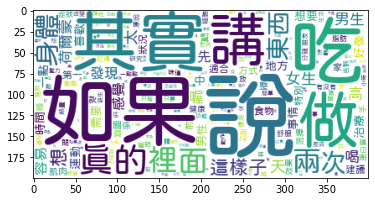

In [146]:
wc_stop = WordCloud(background_color='white', font_path=font_path, random_state=1)
# 生成文字雲
wc_stop.generate_from_frequencies(clouddict_stop)
plt.imshow(wc_stop)

In [55]:
# 列出有可能使用的詞性
Adict={}
for x, y in seg_counter.items():
    if x[1] =='A':
        Adict[x[0]] = y
Adict

{'適婚': 1,
 '非': 5,
 '雙向': 1,
 '前任': 13,
 '現任': 4,
 '一定': 23,
 '一般': 61,
 '超低': 1,
 '綜合': 12,
 '天然': 17,
 '有機': 5,
 '純粹': 3,
 '超級': 6,
 '復古式': 1,
 '原': 3,
 '超': 1,
 '中西': 4,
 '黑白': 2,
 '共同': 10,
 '主要': 26,
 '高度': 5,
 '基本': 7,
 '多餘': 6,
 '萬用': 1,
 '超難用': 1,
 '開架': 3,
 '原來': 5,
 '無糖': 11,
 '絕對': 2,
 '後天': 3,
 '第二手': 1,
 '膠原': 4,
 '後續': 7,
 '跨年': 1,
 '真正': 20,
 '一貫': 1,
 '交感': 22,
 '慢性': 12,
 '少油': 1,
 '幼': 2,
 '單一': 8,
 '額外': 7,
 '深層': 4,
 '雙子': 1,
 '注油式': 1,
 '一星': 1,
 '陳年': 1,
 '不可能': 1,
 '雙': 18,
 '私立': 2,
 '直觀': 2,
 '急性': 5,
 '軟式': 1,
 '重度': 2,
 '有線': 5,
 '無線': 2,
 '臨床': 10,
 '外來': 6,
 '名': 2,
 '良性': 2,
 '苦行': 1,
 '有期': 1,
 '唯一': 4,
 '眾': 1,
 '天使用': 1,
 '原本': 7,
 '阻塞性': 3,
 '加護': 6,
 '適度': 5,
 '本來': 2,
 '最佳': 2,
 '先天': 5,
 '副': 1,
 '消防': 1,
 '次要': 1,
 '日常': 1,
 '惡性': 3,
 '最終': 1,
 '觀用': 1,
 '縱使用': 1,
 '麻辣': 2,
 '口入': 1,
 '故': 1,
 '有氧': 9,
 '藝文': 1,
 '螺旋': 2,
 '台式': 1,
 '家用': 1,
 '低脂': 6,
 '非人': 1,
 '氫化': 1,
 '中式': 2,
 '大幅度': 2,
 '高纖': 4,
 '低糖': 1,
 '法式': 1,
 '上好': 1,
 '人座': 1,
 '獨': 1

In [56]:
Nadict={}
for x, y in seg_counter.items():
    if x[1] =='Na':
        Nadict[x[0]] = y
Nadict

{'三姑六婆': 1,
 '薪水': 3,
 '福利': 2,
 '男朋友': 13,
 '時候': 725,
 '小孩': 43,
 '東西': 288,
 '爸': 14,
 '時間': 174,
 '老大': 84,
 '年齡': 16,
 '事情': 167,
 '機率': 19,
 '關係': 112,
 '現況價': 1,
 '角佈': 1,
 '面膜': 7,
 '蛋糕': 22,
 '蘋現況': 1,
 '假面': 1,
 '男人': 7,
 '一生': 17,
 '股票': 1,
 '體質': 27,
 '股價': 3,
 '高點': 1,
 '輩子': 8,
 '人': 809,
 '偏門': 1,
 '運氣': 2,
 '豪宅': 1,
 '上進心': 2,
 '車': 14,
 '現況': 1,
 '炸彈': 1,
 '轎': 1,
 '投資': 1,
 '老大哥': 1,
 '建議': 39,
 '外表': 2,
 '氣度': 1,
 '內涵': 1,
 '老二': 1,
 '缺點': 16,
 '鞋子': 3,
 '生態': 2,
 '地理': 1,
 '保證': 7,
 '溫泉': 6,
 '車子': 6,
 '衣服': 12,
 '荷葉': 1,
 '禮物': 2,
 '原子': 2,
 '傳天地': 1,
 '樣子': 35,
 '異性緣': 1,
 '責任感': 1,
 '倍': 19,
 '大臣': 1,
 '話': 77,
 '缺失': 1,
 '問題': 375,
 '個性': 12,
 '生活': 71,
 '差異': 12,
 '撒旦': 1,
 '女朋友': 6,
 '男方': 1,
 '經濟': 10,
 '媽': 7,
 '小孩子': 8,
 '工作': 45,
 '家庭': 14,
 '主婦': 1,
 '黃連': 2,
 '老公': 25,
 '妻': 4,
 '女生': 264,
 '彎': 3,
 '錢': 50,
 '房': 5,
 '爸媽': 1,
 '姐妹': 4,
 '瑜珈': 1,
 '腦袋': 9,
 '捷運': 4,
 '文化': 2,
 '愛情': 6,
 '問卷': 4,
 '前腳': 1,
 '可能': 72,
 '感情': 10,
 '金錢觀': 1,
 '白紙': 1,
 '黑字':

In [57]:
Nbdict={}
for x, y in seg_counter.items():
    if x[1] =='Nb':
        Nbdict[x[0]] = y
Nbdict

{'七叔東': 1,
 '阿公司': 1,
 '帝寶': 1,
 '馬爾濟斯': 1,
 '瑪莎拉蒂海': 1,
 '嘉利': 1,
 '三多': 2,
 'Sony': 1,
 '迦爾': 1,
 '愛流': 1,
 '黃帝': 3,
 '內經': 2,
 '天心雪': 1,
 '琪琪': 1,
 '耶他': 1,
 '大有': 2,
 '家樂福': 3,
 '天貓': 1,
 '巨蟹座': 1,
 '唐娜比亞': 1,
 '長庚': 7,
 '義駿': 1,
 '愛白蘭氏': 1,
 '利芝麻明': 1,
 '阿拉貝': 1,
 '辣江坤俊': 1,
 '富邦': 1,
 '萊爾': 1,
 '拉斯仙丹': 1,
 '許': 3,
 '正坤': 1,
 '泰熙': 1,
 '李旺陽': 1,
 '阿比': 1,
 '小編': 5,
 '谷歌': 1,
 '李飛': 1,
 '王奇克': 1,
 '李念': 1,
 '三星': 5,
 '小黑': 1,
 '2.0': 1,
 '毛孔保': 1,
 '全聯': 2,
 '零毛孔蓋亞': 1,
 '契爾氏亞馬遜': 1,
 '花旗': 1,
 '羅記': 1,
 '阿勇師': 1,
 '家好': 1,
 '好多亞': 1,
 '小胖': 2,
 '唐詩經': 1,
 '夫黛妃': 1,
 '金吉他': 1,
 '皮亞': 1,
 '陳皮茶': 1,
 '阿卡漢': 1,
 '顏美容': 1,
 '羅志祥': 1,
 '韓文君': 1,
 '游泳教': 1,
 '盛頓': 1,
 '牡羊座': 2,
 '處女座': 3,
 '五羊座': 1,
 '射手座': 2,
 '雙子座': 2,
 '牧羊座': 1,
 '天蠍座': 1,
 '黃金密': 1,
 '里三陰交': 1,
 '閔': 1,
 '吳克': 1,
 'n95': 1,
 '李尋歡': 1,
 '小李': 1,
 '阿密': 1,
 '平路': 1,
 '阿貴': 1,
 '大77': 1,
 '簡玉清': 1,
 '玉清': 1,
 '周上': 1,
 '猛瑪': 1,
 '伴雲': 1,
 '亞他': 1,
 '愛玉清': 1,
 '菲亞': 1,
 '周杰倫': 1,
 '家福': 1,
 '白西亞': 1,
 '寶拉珍': 1,
 '煥白': 1,

In [58]:
Ncdict={}
for x, y in seg_counter.items():
    if x[1] =='Nc':
        Ncdict[x[0]] = y
Ncdict

{'信義區': 1,
 '眼前': 1,
 '省': 2,
 '保育區': 1,
 '土城': 1,
 '戲宅': 1,
 '家': 100,
 '378巷': 1,
 '馬瀨': 1,
 '大寮': 1,
 '婆家': 1,
 '國小': 3,
 '醫院': 24,
 '世界': 39,
 '老家': 1,
 '早餐店': 5,
 '工作室': 3,
 '長廁所': 1,
 '大學': 9,
 '指尖': 1,
 '校園': 2,
 '神山區': 1,
 '穴位': 33,
 '現場': 4,
 '公司': 21,
 '餐廳': 12,
 '鎮': 1,
 '背後': 6,
 '屏東': 3,
 '築地': 1,
 '台灣': 52,
 '四川': 1,
 '亞': 3,
 '基地': 1,
 '清淨園': 1,
 '飽驗室': 1,
 '廚房': 4,
 '卡路里亞': 1,
 '10號': 1,
 '市場': 8,
 '保大': 1,
 '巴比倫': 1,
 '公賣局': 1,
 '後院': 1,
 '市面': 9,
 '飯店': 2,
 '堂': 1,
 '老店': 1,
 '日本': 12,
 '商店': 1,
 '黃斑部': 1,
 '民間': 1,
 '池塘': 1,
 '竹山': 4,
 '巷口': 1,
 '中心': 7,
 '富陽': 1,
 '荷比': 1,
 '針灸科': 1,
 '系': 4,
 '研究所': 6,
 '背部': 8,
 '頸部': 1,
 '景軒': 1,
 '刮痧樓': 1,
 '肩部': 2,
 '外科': 12,
 '中西醫科': 1,
 '地面': 3,
 '手間': 1,
 '附近': 13,
 '中藥房': 3,
 '背面': 1,
 '大門口': 1,
 '周圍': 6,
 '韓國': 2,
 '泰山': 1,
 '鳳山': 2,
 '臉部': 4,
 '室': 6,
 '黑道': 3,
 '亞馬遜': 1,
 '心目中': 1,
 '三上悠亞': 1,
 '洗手間': 1,
 '隔壁': 4,
 '長春段': 1,
 '夜店': 1,
 '館': 1,
 '三高': 1,
 '腿部': 3,
 '全身': 30,
 '市': 24,
 '南科大': 1,
 '1號': 1,
 '酒館': 1,
 '巴西':

In [60]:
Nddict={}
for x, y in seg_counter.items():
    if x[1] =='Nd':
        Nddict[x[0]] = y
Nddict

{'平常': 55,
 '現在': 290,
 '婚前': 8,
 '未來': 20,
 '婚後': 3,
 '幾點': 2,
 '21世紀': 2,
 '今天': 217,
 '短期': 4,
 '長期': 12,
 '以前': 28,
 '手關節': 1,
 '今': 9,
 '大唐': 1,
 '一下': 275,
 '下午': 13,
 '同時': 34,
 '以後': 16,
 '七七': 6,
 '冬天': 8,
 '剛才': 18,
 '當初': 8,
 '過去': 26,
 '隔天': 7,
 '將來': 4,
 '最後': 92,
 '一陣子': 5,
 '早上': 31,
 '半夜': 3,
 '日常': 8,
 '寸光年': 1,
 '晚上': 57,
 '死下': 1,
 '往後': 5,
 '早晚': 2,
 '21點': 2,
 '這時': 1,
 '明日': 1,
 '星期一': 2,
 '10月': 2,
 '多久': 14,
 '1月': 1,
 '後來': 41,
 '晚來': 1,
 '午': 4,
 '近期': 4,
 '今後': 1,
 '之前': 22,
 '夏天': 10,
 '目前': 75,
 '當天': 13,
 '現': 2,
 '昨晚': 2,
 '露後': 1,
 '夜': 5,
 '3點': 7,
 '南農曆': 1,
 '年輕人節': 1,
 '中慶': 1,
 '初期': 7,
 '一會': 5,
 '明天': 12,
 '198年': 1,
 '黑夜': 1,
 '之後': 7,
 '當年': 2,
 '不久': 3,
 '昨天': 10,
 '喔張': 1,
 '最近': 35,
 '11點': 10,
 '古': 1,
 '早期': 11,
 '5點半': 1,
 '暑假': 1,
 '最初': 2,
 '中午': 9,
 '個面': 1,
 '春天': 4,
 '小時候': 12,
 '當時': 6,
 '一下來': 1,
 '夜晚上': 1,
 '現代': 4,
 '同時候': 1,
 '1點': 8,
 '當日': 1,
 '今生': 2,
 '後': 3,
 '晚': 1,
 '當下': 3,
 '此時': 1,
 '此刻': 1,
 '夏': 7,
 '8月份': 1,
 '春秋': 1

In [64]:
Neqadict={}
for x, y in seg_counter.items():
    if x[1] =='Neqa':
        Neqadict[x[0]] = y
Neqadict

{'一點點': 85,
 '這些': 313,
 '一些': 507,
 '多少': 52,
 '很多': 351,
 '整': 120,
 '多': 34,
 '太多': 32,
 '任何': 62,
 '半點': 1,
 '多一點': 13,
 '一點': 72,
 '全': 43,
 '所有': 88,
 '一半': 21,
 '全部': 39,
 '半': 48,
 '其他': 139,
 '很少': 2,
 '三成': 1,
 '部分': 135,
 '有的': 78,
 '局部': 19,
 '80': 1,
 ' %': 5,
 '一些些': 6,
 '少量': 3,
 '三分之一': 9,
 '大多': 3,
 '好多': 4,
 '5 %': 1,
 '較多': 1,
 '那些': 46,
 '種成分數': 1,
 '有些': 41,
 '大部分': 43,
 '98%': 1,
 '這麼多': 18,
 '多數': 3,
 '少數': 5,
 '全數': 1,
 '許多': 16,
 '不少': 6,
 '100%': 7,
 '5%': 3,
 '一行社': 1,
 '多半': 4,
 '十分之一': 1,
 '別的': 10,
 '絕大多數': 2,
 '大量': 25,
 '一個位': 1,
 '無數': 2,
 '哪些': 72,
 '大多數': 7,
 '整個': 7,
 '更多': 23,
 '某些': 13,
 '過多': 10,
 '一朵朵': 1,
 '半部': 1,
 '大半': 1,
 '少一點': 2,
 '7分之一': 1,
 '二分之一': 1,
 '那麼多': 12,
 '其它': 2,
 '一天天': 1,
 '點點': 4,
 '粒粒': 1,
 '一成': 1,
 '4分之1': 1,
 '三分之二': 5,
 '73.3': 1,
 '50%': 1,
 '1%': 1,
 '一些兒': 1,
 '少許': 1,
 '80%': 1,
 '20%': 1,
 '半成一': 1,
 '滿': 3,
 '4分之1分之14': 1,
 '78': 1,
 '八折': 1,
 '兩成都': 1,
 '七成': 1,
 '極少': 1,
 '五分之一': 1,
 '一切': 6,
 '多所以': 2,
 '一湯匙': 

In [71]:
Nvdict={}
for x, y in seg_counter.items():
    if x[1] =='Nv':
        Nvdict[x[0]] = y
Nvdict

{'出生': 1,
 '抱怨': 1,
 '進步': 1,
 '來往': 1,
 '刮痧': 1,
 '燒烤': 1,
 '體會': 1,
 '使用': 1,
 '卸妝': 1,
 '研究': 10,
 '告知': 1,
 '成長': 5,
 '轉變': 1,
 '製作': 1,
 '分層': 1,
 '專用': 1,
 '申請': 1,
 '檢查': 7,
 '收縮': 2,
 '重訓': 1,
 '健身': 1,
 '無窮': 1,
 '傳導': 1,
 '調整': 4,
 '解脫': 1,
 '按摩': 2,
 '分長': 1,
 '連結': 2,
 '憂鬱': 1,
 '死': 1,
 '消化': 1,
 '代謝': 4,
 '表達': 1,
 '妙': 1,
 '戰鬥': 1,
 '思慮': 1,
 '覺察': 1,
 '結紮': 1,
 '處理': 2,
 '中風': 1,
 '出血': 1,
 '狹窄': 1,
 '阻塞': 2,
 '變慢': 1,
 '類比': 1,
 '配合': 1,
 '會診': 1,
 '門診': 2,
 '恢復': 1,
 '合谷': 1,
 '照顧': 1,
 '思考': 6,
 '污染': 1,
 '運行': 1,
 '幫忙': 2,
 '累積': 1,
 '疲勞': 1,
 '開始': 2,
 '吃飯': 1,
 '理解': 1,
 '睡覺': 1,
 '調控': 2,
 '感染': 16,
 '恐懼': 2,
 '爬牆': 1,
 '支撐': 1,
 '努力': 1,
 '損傷': 1,
 '疲憊': 1,
 '溝通': 2,
 '進捷': 1,
 '比較': 3,
 '摧殘': 1,
 '分佈': 1,
 '產出': 1,
 '疑惑': 1,
 '生產': 1,
 '勞動': 1,
 '設定': 3,
 '經歷': 6,
 '確診': 1,
 '紓壓': 1,
 '健康': 5,
 '控制': 4,
 '空白': 1,
 '優惠': 2,
 '挑選': 1,
 '支持': 3,
 '不便': 1,
 '吸收': 1,
 '冷凍': 1,
 '重要': 1,
 '購物': 1,
 '調配': 1,
 '天生': 1,
 '壞死': 1,
 '評估': 2,
 '痛': 2,
 '發展': 1,
 '補充': 1,
 

In [74]:
VAdict={}
for x, y in seg_counter.items():
    if x[1] =='VA':
        VAdict[x[0]] = y
VAdict

{'回家': 12,
 '過年': 1,
 '上班': 13,
 '結婚': 17,
 '換七八糟': 1,
 '離婚': 1,
 '逛街': 1,
 '脫褲': 2,
 '賭博': 1,
 '患難': 1,
 '趴': 8,
 '旅行': 3,
 '小便': 8,
 '走': 61,
 '妥協': 1,
 '進去': 45,
 '工作': 27,
 '玩耍': 1,
 '買醉': 2,
 '插花': 1,
 '坐下來': 1,
 '出嫁妝': 1,
 '奉子': 1,
 '成婚': 1,
 '吵吵鬧鬧': 1,
 '為曲求全': 1,
 '相處': 6,
 '來': 120,
 '吵架': 7,
 '推演': 1,
 '拜拜': 45,
 '拉屎拉': 1,
 '潤腸': 3,
 '禮拜': 1,
 '講話': 28,
 '站起來': 5,
 '相表': 2,
 '排便': 6,
 '笑': 10,
 '出來': 68,
 '站': 11,
 '蠕動': 3,
 '出國': 2,
 '減脂': 39,
 '旅遊': 3,
 '逆流': 14,
 '花錢': 2,
 '升起來': 1,
 '遊戲': 1,
 '交朋友': 1,
 '來往': 1,
 '舉手': 5,
 '往來': 2,
 '灌頂': 1,
 '說出口': 1,
 '說謊': 2,
 '跳出來': 1,
 '分手': 4,
 '聚': 1,
 '減肥': 41,
 '用回去': 1,
 '開箱': 10,
 '下來': 9,
 '還款': 1,
 '下去': 13,
 '洗澡': 4,
 '起床': 17,
 '健身': 24,
 '過來': 10,
 '翻花': 1,
 '挑戰出來': 1,
 '留言': 14,
 '做菜': 3,
 '出去': 27,
 '吃飯': 23,
 '開夥': 1,
 '進來': 13,
 '遊樂': 1,
 '選美': 1,
 '回去': 17,
 '抽菸': 4,
 '睡早起': 1,
 '遊玩': 1,
 '射精': 42,
 '養菌': 2,
 '下班': 13,
 '睡覺': 46,
 '噴漆': 1,
 '賺錢': 1,
 '解約': 1,
 '合花': 1,
 '養血': 2,
 '熬夜': 5,
 '休息': 19,
 '排毒': 17,
 '啦配': 

In [75]:
VACdict={}
for x, y in seg_counter.items():
    if x[1] =='VAC':
        VACdict[x[0]] = y
VACdict

{'翻轉': 2,
 '旋轉': 11,
 '動': 52,
 '收縮': 22,
 '轉動': 4,
 '轉': 14,
 '移動': 5,
 '搖擺': 1,
 '扭動': 1,
 '抖': 3,
 '動員': 1,
 '集合': 1,
 '運轉': 1,
 '顫抖': 2,
 '迴轉': 2,
 '堆疊': 1,
 '噴出來': 2,
 '搖': 1,
 '上映': 1,
 '聳動': 1,
 '聚集': 1,
 '轉轉': 1,
 '集結': 1,
 '波動': 1,
 '搖晃': 1,
 '震動': 11,
 '亂動': 1}

In [76]:
VBdict={}
for x, y in seg_counter.items():
    if x[1] =='VB':
        VBdict[x[0]] = y
VBdict

{'表現出來': 3,
 '搬出去': 1,
 '寫下來': 3,
 '上架': 2,
 '按下去': 6,
 '加下去': 1,
 '開玩笑': 3,
 '學起來': 3,
 '拿進去': 1,
 '放進去': 16,
 '美容': 6,
 '解質': 1,
 '加油': 2,
 '抽脂': 10,
 '再見': 21,
 '記錄下來': 2,
 '掛上來': 1,
 '化妝': 2,
 '去角質': 1,
 '翻過來': 1,
 '提前': 3,
 '買下去': 1,
 '約會': 9,
 '合起來': 5,
 '做出來': 8,
 '丟進去': 2,
 '泡酒': 2,
 '打招呼': 1,
 '拍照': 3,
 '加上來去': 1,
 '解毒': 8,
 '開刀': 5,
 '記起來': 1,
 '轉過去': 1,
 '美顏': 1,
 '買回去': 2,
 '拿出來': 22,
 '加起來': 4,
 '分類': 1,
 '洗腦': 1,
 '散播出去': 1,
 '趕出去': 1,
 '刷下來': 1,
 '頒獎': 2,
 '舉起來': 3,
 '縮起來': 1,
 '拿起來': 6,
 '對比': 1,
 '加壓': 1,
 '拍起來': 1,
 '提班': 1,
 '放下來': 1,
 '壓下來': 2,
 '一概而論': 1,
 '刺青': 1,
 '針灸': 11,
 '洽進去': 1,
 '對過來': 1,
 '分層': 1,
 '連線': 3,
 '急診': 3,
 '主治': 1,
 '復健': 4,
 '講': 1,
 '搔癢': 3,
 '煮熟': 2,
 '推拿': 5,
 '拿來來': 1,
 '說': 2,
 '介紹好': 1,
 '應對': 1,
 '帶上來': 1,
 '帶下來': 1,
 '收進來': 1,
 '抬起來': 6,
 '染髮': 1,
 '生出來': 2,
 '打電話': 7,
 '拉上來': 2,
 '止痛': 8,
 'SPA': 1,
 '治病': 1,
 '浸泡': 2,
 '帶進來': 1,
 '舒壓': 1,
 '取出來': 3,
 '收看起來': 1,
 '加工': 14,
 '吃下來': 1,
 '搭配下來': 1,
 '分段': 1,
 '體檢': 3,
 '加熱': 7,
 '拉下來': 

In [77]:
VCdict={}
for x, y in seg_counter.items():
    if x[1] =='VC':
        VCdict[x[0]] = y
VCdict

{'生': 86,
 '做': 511,
 '網購': 1,
 '辦': 11,
 '開': 40,
 '讀': 9,
 '吃': 626,
 '買': 114,
 '看': 316,
 '買到': 15,
 '套': 11,
 '陪到': 1,
 '放': 105,
 '嫁給': 2,
 '抱': 4,
 '拐勾': 1,
 '放大': 5,
 '自找': 1,
 '甩': 5,
 '納': 7,
 '帶': 56,
 '拿大': 1,
 '打遊': 1,
 '拉': 27,
 '教': 45,
 '接受': 32,
 '唱': 9,
 '呼求': 1,
 '喝': 211,
 '接過去': 1,
 '等': 9,
 '辭掉': 1,
 '照顧': 7,
 '學': 13,
 '調整': 69,
 '吵到': 2,
 '產': 3,
 '處理': 47,
 '規劃': 1,
 '用': 120,
 '看過': 9,
 '傳導': 3,
 '消磨': 1,
 '提': 5,
 '趕': 2,
 '害苦': 1,
 '夾': 1,
 '實現': 1,
 '生完': 1,
 '嫁到': 1,
 '靠近': 19,
 '訂閱': 23,
 '按摩': 73,
 '拿': 83,
 '外送': 1,
 '握': 1,
 '治療': 121,
 '廢棄': 4,
 '揮動': 1,
 '幫助': 102,
 '按': 28,
 '刪去': 1,
 '辨別': 1,
 '求必': 1,
 '念': 6,
 '指向': 2,
 '掰': 1,
 '管理': 8,
 '吃到': 29,
 '塞': 16,
 '調節': 7,
 '舒緩': 15,
 '拜託': 4,
 '調調出': 1,
 '打開': 34,
 '問候': 2,
 '試試': 18,
 '聽進去': 1,
 '翻': 4,
 '比': 4,
 '掛': 5,
 '保護': 28,
 '離開': 2,
 '玩玩': 1,
 '陪': 6,
 '打': 72,
 '分割': 2,
 '斷絕': 1,
 '聯絡': 4,
 '開出': 2,
 '面對': 12,
 '找': 82,
 '弄': 21,
 '煮': 36,
 '破解': 5,
 '吃完': 13,
 '配': 6,
 '沾': 3,
 '生吃': 3,
 

In [79]:
VDdict={}
for x, y in seg_counter.items():
    if x[1] =='VD':
        VDdict[x[0]] = y
VDdict

{'租': 2,
 '賠光': 1,
 '傳': 13,
 '送': 19,
 '補償': 3,
 '給': 193,
 '送給': 4,
 '傳送': 2,
 '提供': 37,
 '做給': 2,
 '推薦給': 16,
 '交給': 5,
 '回覆': 9,
 '寄給': 1,
 '還給': 1,
 '打給': 8,
 '賣': 16,
 '給上': 1,
 '補助': 4,
 '帶給': 2,
 '開給': 2,
 '寄': 9,
 '貸款到': 1,
 '洗掉給': 1,
 '給付': 2,
 '發': 10,
 '傳給': 6,
 '回': 4,
 '加發': 1,
 '講給': 1,
 '給予': 1,
 '繳': 3,
 '贏': 3,
 '提供給': 11,
 '覆': 2,
 '傳遞': 1,
 '搶': 1,
 '還': 10,
 '介紹給': 2,
 '付': 3,
 '配': 1,
 '留給': 1,
 '分配': 3,
 '分配給': 1,
 '調傳': 1,
 '申請給': 1,
 '送來': 1,
 '傳染': 15,
 '匯': 1,
 '讓給': 1,
 '交': 1,
 '外租': 1,
 '輸': 1,
 '拍給': 1,
 '寄送給': 1,
 '連結給': 1,
 '傳送給': 1,
 '外送': 1,
 '接送給': 1,
 '轉給': 1,
 '推給': 1,
 '入侵給': 1,
 '附贈': 1,
 '選給': 1,
 '留做': 1,
 '貸': 1,
 '發送': 2,
 '提交': 1,
 '餵給': 1,
 '詐騙': 12,
 '討': 1,
 '回撥': 1,
 '傳染給': 1,
 '施打給': 1,
 '感染給': 1,
 '連接給': 1,
 '出租': 2,
 '發現給': 1,
 '傳達給': 1,
 '分': 1,
 '拉輸': 1,
 '分享給': 1,
 '進賣': 1,
 '索': 1,
 '放為': 1,
 '反饋給': 2}

In [80]:
VFdict={}
for x, y in seg_counter.items():
    if x[1] =='VF':
        VFdict[x[0]] = y
VFdict

{'叫': 54,
 '繼續': 28,
 '強迫': 4,
 '試': 13,
 '要求': 8,
 '鼓勵': 11,
 '請': 101,
 '準備': 10,
 '停止': 9,
 '說給': 1,
 '逼': 2,
 '申請': 8,
 '說服': 2,
 '嘗試': 24,
 '拒絕': 3,
 '著手': 3,
 '試試': 3,
 '受命': 1,
 '勉強': 3,
 '供': 2,
 '打算': 1,
 '恐嚇': 2,
 '假裝': 1,
 '敬請': 1,
 '罰': 1,
 '擬': 1,
 '不許': 1,
 '哀求': 1,
 '強制': 2,
 '催': 1,
 '圖': 2,
 '試經': 1,
 '指派': 1,
 '迫': 1}

In [81]:
VEdict={}
for x, y in seg_counter.items():
    if x[1] =='VE':
        VEdict[x[0]] = y
VEdict

{'問': 101,
 '聊': 19,
 '想': 277,
 '聽聽': 1,
 '想清楚': 6,
 '看': 91,
 '幻想': 5,
 '說': 1043,
 '講': 460,
 '管': 24,
 '抱怨': 2,
 '告訴': 94,
 '要': 33,
 '講句': 1,
 '答應': 2,
 '談': 15,
 '討論到': 1,
 '以為': 28,
 '談不過': 1,
 '做到': 16,
 '聽': 64,
 '見': 40,
 '想要': 178,
 '發現': 193,
 '算': 14,
 '講到': 25,
 '討論': 21,
 '控': 1,
 '限制': 1,
 '亂講': 3,
 '聽到': 48,
 '請問': 22,
 '反省': 1,
 '聽說': 11,
 '問講': 1,
 '看到': 124,
 '標榜': 4,
 '介紹': 48,
 '想說': 37,
 '聊聊': 6,
 '想到': 23,
 '叫': 17,
 '講講': 4,
 '考慮': 17,
 '搞清楚': 2,
 '防止': 5,
 '建議': 104,
 '祝': 2,
 '查詢': 2,
 '安排': 2,
 '禁止': 13,
 '查到': 6,
 '觀察': 18,
 '提醒': 31,
 '查': 22,
 '提': 21,
 '保證': 10,
 '見到': 4,
 '述': 1,
 '說到': 8,
 '到': 20,
 '尖叫': 1,
 '聞': 1,
 '說好': 6,
 '認為': 47,
 '猜': 5,
 '諮詢': 6,
 '詢問': 7,
 '看見': 3,
 '發現到': 5,
 '請教': 4,
 '看看': 18,
 '實驗': 1,
 '大叫': 1,
 '傳明': 2,
 '稱': 1,
 '預防': 28,
 '反應': 7,
 '曰': 1,
 '見得': 2,
 '感想': 1,
 '長說': 1,
 '聽好': 1,
 '證': 2,
 '說明白': 1,
 '說明': 10,
 '直說': 2,
 '探討': 3,
 '報導': 1,
 '決定': 16,
 '講解': 7,
 '陸許': 1,
 '指定': 2,
 '驗證': 2,
 '回想': 3,
 '出來': 3,
 '研究': 6

In [82]:
VGdict={}
for x, y in seg_counter.items():
    if x[1] =='VG':
        VGdict[x[0]] = y
VGdict

{'叫做': 141,
 '變成': 78,
 '當成': 15,
 '變': 82,
 '算是': 26,
 '叫': 43,
 '屬於': 37,
 '按成': 1,
 '秘成': 1,
 '當': 36,
 '作為': 4,
 '算': 8,
 '等於': 25,
 '稱為': 5,
 '當作': 12,
 '切成': 2,
 '打成': 3,
 '做': 3,
 '改變成': 1,
 '轉換成': 1,
 '好似': 1,
 '換成': 11,
 '成': 21,
 '像': 106,
 '沖泡成': 1,
 '做成': 13,
 '消化成': 1,
 '好稱': 1,
 '為': 41,
 '造成': 32,
 '類似': 24,
 '成為': 8,
 '改成': 7,
 '身為': 2,
 '合成': 4,
 '慢變成': 1,
 '皂成': 1,
 '有氧成': 1,
 '分成': 29,
 '就任': 1,
 '稱': 8,
 '調整為': 1,
 '形成': 6,
 '計': 3,
 '調作': 1,
 '轉成': 5,
 '煮成': 3,
 '淪為': 2,
 '打叫做': 1,
 '分為': 4,
 '居': 1,
 '非': 2,
 '當為': 1,
 '說成': 1,
 '弄成': 1,
 '題為': 1,
 '指': 12,
 '為所以': 1,
 '偏為': 1,
 '兼': 1,
 '做做成': 1,
 '甜言成': 1,
 '似': 1,
 '叫作': 1,
 '製成': 2,
 '復為': 1,
 '組成': 2,
 '算得': 1,
 '想成': 2,
 '即': 1,
 '剪成': 1,
 '廖道成': 1,
 '寫成': 1,
 '形容成': 2,
 '想像成': 1,
 '表現成': 1,
 '食為': 1,
 '擔任': 2,
 '換算成': 1,
 '列為': 1,
 '屬': 2,
 '穿成': 1,
 '研磨成': 1,
 '係': 5,
 '理解成': 1,
 '講成': 1,
 '誤會成': 1,
 '整理成': 1,
 '細牙成': 1,
 '製造為': 1,
 '何謂': 1,
 '提升為': 1,
 '兌換成': 1,
 '做為': 1,
 '等同': 1,
 '叫叫': 1,
 '名叫做': 1,
 '

In [83]:
VHdict={}
for x, y in seg_counter.items():
    if x[1] =='VH':
        VHdict[x[0]] = y
VHdict

{'好不好': 6,
 '怎麼': 16,
 '清楚': 40,
 '這樣': 452,
 '超高': 2,
 '單身': 18,
 '一言難盡': 1,
 '怎麼說': 6,
 '封閉': 1,
 '危險': 14,
 '高高低低': 1,
 '一樣': 219,
 '高': 217,
 '爽': 13,
 '有錢': 4,
 '傲狠夫': 1,
 '相反': 7,
 '多': 158,
 '定時': 1,
 '成長': 5,
 '慢慢': 65,
 '進步': 16,
 '在一起': 39,
 '好玩': 3,
 '帥': 2,
 '大': 343,
 '舒服': 102,
 '出現': 68,
 '亂': 21,
 '可能': 41,
 '真實': 5,
 '準時': 4,
 '好': 815,
 '是無忌憚': 1,
 '太多': 25,
 '小': 146,
 '死掉': 6,
 '平': 4,
 '沒日沒夜': 1,
 '閨蜜': 1,
 '退讓': 2,
 '多切': 1,
 '理所當然': 2,
 '偉大': 6,
 '值得': 20,
 '單純': 26,
 '傷感情': 1,
 '米油鹽': 1,
 '不同': 98,
 '爆裂': 1,
 '最好': 7,
 '負債': 7,
 '詳細': 7,
 '現實': 1,
 '雅': 1,
 '完整': 16,
 '適合': 129,
 '深': 13,
 '一廂情願': 1,
 '特別': 126,
 '超難': 1,
 '胖': 24,
 '老': 27,
 '變醜': 1,
 '重要': 121,
 '年輕': 22,
 '好物': 1,
 '兩敗俱傷': 1,
 '再生': 3,
 '大尤其': 1,
 '明顯': 36,
 '無能': 1,
 '幸福': 10,
 '開開心心': 1,
 '錯': 11,
 '假': 12,
 '遙遙領先': 1,
 '順順利利': 1,
 '泡死': 1,
 '簡單': 87,
 '快': 43,
 '容易': 194,
 '生病': 3,
 '怎麼辦': 22,
 '便秘': 18,
 '落順': 1,
 '順順': 1,
 '開始': 42,
 '通': 5,
 '這樣子': 283,
 '相像': 1,
 '有效': 50,
 '大同': 1,
 '

In [84]:
VHCdict={}
for x, y in seg_counter.items():
    if x[1] =='VHC':
        VHCdict[x[0]] = y
VHCdict

{'穩定': 36,
 '分開': 3,
 '放鬆': 44,
 '氣死': 1,
 '肥': 4,
 '累': 19,
 '豐富': 25,
 '熱': 33,
 '降低': 36,
 '均衡': 15,
 '強化': 10,
 '結合': 12,
 '傷': 5,
 '增加': 63,
 '鬆弛': 3,
 '變小': 3,
 '麻煩': 8,
 '老化': 16,
 '平衡': 17,
 '緊繃': 8,
 '淡化': 1,
 '誇張': 8,
 '減少': 43,
 '淨化': 1,
 '溫': 2,
 '溫暖': 4,
 '結束': 15,
 '塑石化': 1,
 '恢復': 21,
 '刺痛': 1,
 '破': 6,
 '變短': 1,
 '感動': 2,
 '擴張': 3,
 '有害': 3,
 '暫停': 5,
 '辛苦': 9,
 '乳化': 2,
 '產生': 85,
 '溶解掉': 1,
 '累到': 1,
 '客製化': 1,
 '估準化': 1,
 '多元化': 1,
 '斷': 5,
 '年輕化': 3,
 '鬆': 9,
 '變化': 2,
 '改善化': 1,
 '壞': 6,
 '困擾': 12,
 '煩': 5,
 '減輕': 6,
 '溶解': 9,
 '退化': 4,
 '低下': 3,
 '振奮': 3,
 '鬆開': 2,
 '鬱化': 1,
 '阻塞': 10,
 '暴露': 1,
 '嚇死': 1,
 '優化': 1,
 '運化': 3,
 '活化': 2,
 '固定': 4,
 '安定': 3,
 '加快': 2,
 '陷': 1,
 '健脾化': 1,
 '混淆': 2,
 '止': 1,
 '堅定': 1,
 '滿足': 16,
 '潤滑': 2,
 '分數化': 1,
 '還原': 1,
 '融化': 1,
 '餓死': 1,
 '渴死': 1,
 '冰': 3,
 '分散': 4,
 '增長': 1,
 '縮小': 2,
 '升高': 2,
 '品牌化': 1,
 '解凍': 1,
 '抗氧化': 1,
 '演化': 1,
 '精緻化': 1,
 '空': 5,
 '落實': 2,
 '強強化': 1,
 '增強': 1,
 '脾胃運化': 1,
 '溫歸': 1,
 '可憐': 3,
 '解散': 1,


In [85]:
VIdict={}
for x, y in seg_counter.items():
    if x[1] =='VI':
        VIdict[x[0]] = y
VIdict

{'沒辦法': 43,
 '陌生': 3,
 '半信半疑': 1,
 '來自於': 10,
 '得來': 1,
 '為主': 15,
 '心悸': 4,
 '過敏': 23,
 '受限': 2,
 '專用': 2,
 '習以為常': 1,
 '居多': 2,
 '心動': 2,
 '感恩': 2,
 '著想': 1,
 '引以為傲': 1,
 '取決': 3,
 '驚艷': 2,
 '雷同': 1,
 '垂直': 2,
 '關聯': 4,
 '為本': 1,
 '為題': 1}

In [86]:
VJdict={}
for x, y in seg_counter.items():
    if x[1] =='VJ':
        VJdict[x[0]] = y
VJdict

{'養不起': 1,
 '沒': 75,
 '大有': 4,
 '犧牲': 9,
 '沒有': 406,
 '發生': 76,
 '信任': 6,
 '有憑有': 1,
 '共有': 1,
 '惜': 1,
 '有關': 42,
 '包容': 2,
 '分享': 64,
 '受到': 22,
 '抗': 31,
 '不到': 7,
 '無': 30,
 '維持': 15,
 '有所': 6,
 '分有': 1,
 '比不上': 2,
 '保持': 17,
 '受': 16,
 '認識': 21,
 '偏重': 2,
 '占': 1,
 '少掉': 2,
 '達': 7,
 '超過': 48,
 '不如': 8,
 '具': 5,
 '合': 5,
 '得': 29,
 '隔': 5,
 '持': 2,
 '含有': 11,
 '阿含有': 1,
 '低上': 1,
 '到': 5,
 '爆發': 2,
 '缺': 14,
 '失去': 8,
 '具有': 4,
 '買不過': 1,
 '近似': 1,
 '認同': 2,
 '充滿': 9,
 '減': 13,
 '來自': 13,
 '管不住': 1,
 '達到': 29,
 '得到': 34,
 '走不了': 1,
 '歡迎': 12,
 '嚇到': 4,
 '重': 2,
 '剩下': 10,
 '感染': 32,
 '緩解': 13,
 '重視': 8,
 '缺乏': 10,
 '氧化': 4,
 '符合': 7,
 '轉': 3,
 '富含': 9,
 '自於': 1,
 '偏': 20,
 '想': 3,
 '呈現出': 2,
 '長出': 6,
 '發揮': 6,
 '適用': 4,
 '佩服': 2,
 '獲得': 16,
 '包含': 9,
 '熟悉': 6,
 '靠': 10,
 '患': 2,
 '緊接': 1,
 '反射': 2,
 '忽略掉': 1,
 '摸不著': 1,
 '忽略': 5,
 '影響到': 50,
 '想盡': 1,
 '背': 1,
 '適應': 2,
 '享受': 35,
 '順': 6,
 '紓解': 1,
 '抒解': 1,
 '近': 1,
 '理': 6,
 '功於': 1,
 '遺傳': 2,
 '容': 2,
 '思念': 2,
 '剩': 6,
 '看好'

In [88]:
VLdict={}
for x, y in seg_counter.items():
    if x[1] =='VL':
        VLdict[x[0]] = y
VLdict

{'愛': 60,
 '讓': 478,
 '敢': 26,
 '開始': 131,
 '習慣': 12,
 '捨不得': 2,
 '任': 2,
 '好': 5,
 '導致': 87,
 '用來': 11,
 '偏向': 8,
 '致': 2,
 '不屑': 1,
 '負責': 5,
 '持續': 21,
 '便利': 3,
 '使得': 6,
 '使': 8,
 '專門': 8,
 '偏上': 1,
 '足': 1,
 '提早': 9,
 '有心': 1,
 '故意': 2,
 '令': 7,
 '懶得': 1,
 '促使': 1,
 '誘發': 1,
 '傾向於': 1,
 '宜': 1,
 '捨得': 1,
 '趨': 1,
 '自願': 1,
 '不予': 1,
 '愛愛': 1,
 '喜好': 1,
 '叫': 1,
 '教': 1,
 '後悔': 1}

In [90]:
FWdict={}
for x, y in seg_counter.items():
    if x[1] =='FW':
        FWdict[x[0]] = y
FWdict

{'Rap': 1,
 'ok': 41,
 'waterphone': 1,
 'iPhone': 1,
 '霖': 1,
 'sweet': 1,
 '蒻': 1,
 'email': 2,
 ' percent': 6,
 'B': 5,
 'e x': 2,
 'ktv': 4,
 'Gucci': 2,
 'e': 3,
 'YouTube': 10,
 'ASUS': 1,
 'T': 4,
 'DHC': 2,
 'HDR': 2,
 'mate': 1,
 'dq': 1,
 'B3': 1,
 'omega': 1,
 'Cartier ': 1,
 'HK bf apha': 1,
 'Stand': 1,
 'LINE': 6,
 'C': 13,
 'no way': 1,
 'iPad': 2,
 'OK': 4,
 'Germany': 1,
 'PS': 1,
 'H': 2,
 'Bellavita': 1,
 'taxi': 1,
 'youtuber': 1,
 'msk': 1,
 'IPO': 1,
 'Google': 18,
 'epa dha': 1,
 'SLS sles': 1,
 'SLS': 1,
 'iherb': 1,
 'fb': 1,
 'ib': 1,
 'VISTA': 1,
 'sister': 1,
 'beyond': 1,
 '3D': 1,
 'big4 twk': 1,
 'twk': 1,
 'B1 b2 B6 B': 1,
 '12 beta': 1,
 'c b e k': 1,
 'D': 11,
 'K C': 1,
 'snq': 2,
 'q': 5,
 'paper': 13,
 'peperoncino': 1,
 'd3a a clean label ': 1,
 'label': 1,
 'a clever': 1,
 'a clean label': 1,
 'selection': 1,
 'monsters': 1,
 '3C': 7,
 'WiFi': 1,
 'Office': 1,
 'Micros': 1,
 'oft sculpt': 1,
 'A4': 2,
 'phli': 1,
 'little': 1,
 'DHL': 1,
 'a': 2,


In [115]:
# 依專題來說，使用詞類：A,Na,Nb,Nc,Nv,VA,VAC,VH,VHC,VI,FW 以上?
clouddict_adjust = {}
for x, y in seg_counter.items():
    if x[1] in ['A','Na','Nb','Nc','Nv','VA','VAC','VH','VHC','VI','FW']:
        if x[0] in clouddict_adjust:
            clouddict_adjust[x[0]] += y
        else:
            clouddict_adjust[x[0]] = y
clouddict_adjust

{'回家': 12,
 '過年': 1,
 '三姑六婆': 1,
 '七叔東': 1,
 '上班': 13,
 '薪水': 3,
 '福利': 2,
 '好不好': 6,
 '男朋友': 13,
 '怎麼': 16,
 '時候': 725,
 '結婚': 17,
 '小孩': 43,
 '東西': 288,
 '換七八糟': 1,
 '爸': 14,
 '時間': 174,
 '老大': 84,
 '適婚': 1,
 '年齡': 16,
 '事情': 167,
 '清楚': 40,
 '這樣': 452,
 '超高': 2,
 '機率': 19,
 '離婚': 1,
 '單身': 18,
 '關係': 112,
 '一言難盡': 1,
 '怎麼說': 6,
 '現況價': 1,
 '信義區': 1,
 '封閉': 1,
 '角佈': 1,
 '面膜': 7,
 '逛街': 1,
 '蛋糕': 22,
 '蘋現況': 1,
 '假面': 1,
 '危險': 14,
 '眼前': 1,
 '男人': 7,
 '一生': 17,
 '高高低低': 1,
 '股票': 1,
 '一樣': 219,
 '阿公司': 1,
 '體質': 27,
 '股價': 3,
 '高': 219,
 '爽': 13,
 '高點': 1,
 '輩子': 8,
 '脫褲': 2,
 '有錢': 4,
 '人': 809,
 '傲狠夫': 1,
 '偏門': 1,
 '運氣': 2,
 '帝寶': 1,
 '豪宅': 1,
 '相反': 7,
 '上進心': 2,
 '馬爾濟斯': 1,
 '瑪莎拉蒂海': 1,
 '車': 14,
 '多': 158,
 '現況': 1,
 '賭博': 1,
 '定時': 1,
 '炸彈': 1,
 '轎': 1,
 '投資': 1,
 '穩定': 36,
 '成長': 10,
 '慢慢': 65,
 '進步': 17,
 '老大哥': 1,
 '建議': 39,
 '在一起': 39,
 '好玩': 3,
 '患難': 1,
 '外表': 2,
 '帥': 2,
 '氣度': 1,
 '內涵': 1,
 '老二': 1,
 '大': 343,
 '舒服': 102,
 '趴': 8,
 '缺點': 16,
 '出現': 68,
 '鞋子': 3,
 '省':

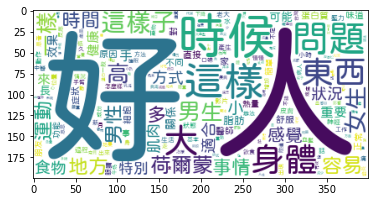

In [140]:
wc_adjust = WordCloud(background_color='white', font_path=font_path, random_state=1)
# 生成文字雲
wc_adjust.generate_from_frequencies(clouddict_adjust)
plt.imshow(wc_adjust)

In [ ]:
clouddict_adjust = {}
for x, y in seg_counter.items():
    if x[0] not in stopwords:
        if x[1] in ['A','Na','Nb','Nc','Nv','VA','VAC','VH','VHC','VI','FW']:
            if x[0] in clouddict_adjust:
                clouddict_adjust[x[0]] += y
            else:
                clouddict_adjust[x[0]] = y
    else:
        pass
clouddict_adjust

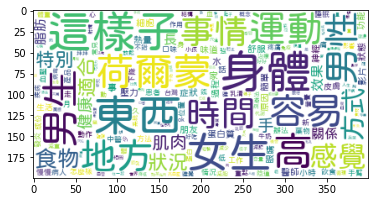

In [147]:
# 使用停用字
clouddict_adjust_stop = {}
for x, y in seg_counter.items():
    if x[0] not in stopwords:
        if x[1] in ['A','Na','Nb','Nc','Nv','VA','VAC','VH','VHC','VI','FW']:
            if x[0] in clouddict_adjust_stop:
                clouddict_adjust_stop[x[0]] += y
            else:
                clouddict_adjust_stop[x[0]] = y
        else:
            pass
    else:
        pass
wc_adjust_stop = WordCloud(background_color='white', font_path=font_path, random_state=1)
# 生成文字雲
wc_adjust_stop.generate_from_frequencies(clouddict_adjust_stop)
plt.imshow(wc_adjust_stop)

In [151]:
# 另一種計算方法
# 單一集數不留全部斷詞，只留不重複的
alltext_1 = []
# 取10月之後的資料
for file in data.values():
    for name, texts in file.items():
        counttext = set()
        if int(name.split('_')[-1].split('.')[0]) >= int("20211001"):
            word_sentence_list = ws(list(texts))
            pos_sentence_list = pos(word_sentence_list)
            for i in range(len(texts)):
                for word in zip(word_sentence_list[i], pos_sentence_list[i]):
                    counttext.add(word)
            alltext_1.extend(list(counttext))
        else:
            continue

In [152]:
len(alltext_1)

63416

In [153]:
seg_counter_1 = Counter(alltext_1)
seg_counter_1

Counter({('女生', 'Na'): 51,
         ('一樣', 'VH'): 93,
         ('唱', 'VC'): 8,
         ('男朋友', 'Na'): 6,
         ('舒服', 'VH'): 48,
         ('甩', 'VC'): 3,
         ('記得', 'VK'): 60,
         ('學費', 'Na'): 1,
         ('教', 'VC'): 29,
         ('四', 'Neu'): 28,
         ('一點點', 'Neqa'): 45,
         ('主婦', 'Na'): 1,
         ('婚姻', 'Na'): 1,
         ('讓', 'VL'): 110,
         ('互相', 'D'): 7,
         ('自己', 'Nh'): 102,
         ('吵架', 'VA'): 4,
         ('耶', 'T'): 8,
         ('你們', 'Nh'): 79,
         ('有關', 'VJ'): 24,
         ('幫', 'P'): 55,
         ('在', 'P'): 136,
         ('包容', 'VJ'): 2,
         ('走向', 'VCL'): 3,
         ('378巷', 'Nc'): 1,
         ('無論如何', 'Dk'): 1,
         ('非常', 'Dfa'): 88,
         ('件', 'Nf'): 33,
         ('衣服', 'Na'): 10,
         ('一起', 'D'): 49,
         ('常', 'D'): 40,
         ('才', 'Da'): 89,
         ('七叔東', 'Nb'): 1,
         ('同', 'D'): 7,
         ('管', 'VE'): 14,
         ('就', 'D'): 144,
         ('搬出去', 'VB'): 1,
         ('跟', 'P'): 1

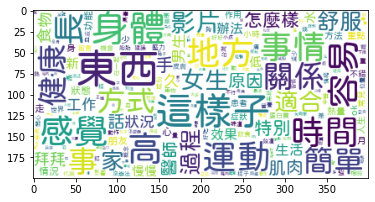

In [154]:
# 使用停用字與詞性
clouddict_1 = {}
for x, y in seg_counter_1.items():
    if x[0] not in stopwords:
        if x[1] in ['A','Na','Nb','Nc','Nv','VA','VAC','VH','VHC','VI','FW']:
            if x[0] in clouddict_1:
                clouddict_1[x[0]] += y
            else:
                clouddict_1[x[0]] = y
        else:
            pass
    else:
        pass
wc_1 = WordCloud(background_color='white', font_path=font_path, random_state=1)
# 生成文字雲
wc_1.generate_from_frequencies(clouddict_1)
plt.imshow(wc_1)

## WordCloud 參數
* font_path=None, 設定字體
* margin=2, 文字間距
* min_font_size=4, max_font_size=None, 文字大小
* width=400, height=200,  長寬解析度
* background_color='black', 背景顏色
* mask=None, 遮罩 有用的話則無視設定長寬
* max_words=200, 取多少文字在裡面 
* relative_scaling='auto', 詞頻與詞大小關聯性
* stopwords=None 
* min_word_length=0,
* ranks_only=None, 
* prefer_horizontal=0.9, 
* scale=1, 
* color_func=None, 
* random_state=None, 
* font_step=1,
* mode='RGB', 
* regexp=None,
* collocations=True, 
* colormap=None,
* normalize_plurals=True, 
* contour_width=0,
* contour_color='black', 
* repeat=False,
* include_numbers=False, 
* collocation_threshold=30

## Ckip詞性對照表

|Type|Description|
|:-|:-|
|A|非謂形容詞|
|Caa|對等連接詞|
|Cab|連接詞，如：等等|
|Cba|連接詞，如：的話|
|Cbb|關聯連接詞|
|D|副詞|
|Da|數量副詞|
|Dfa|動詞前程度副詞|
|Dfb|動詞後程度副詞|
|Di|時態標記|
|Dk|句副詞|
|DM|定量式|
|I|感嘆詞|
|Na|普通名詞|
|Nb|專有名詞|
|Nc|地方詞|
|Ncd|位置詞|
|Nd|時間詞|
|Nep|指代定詞|
|Neqa|數量定詞|
|Neqb|後置數量定詞|
|Nes|特指定詞|
|Neu|數詞定詞|
|Nf|量詞|
|Ng|後置詞|
|Nh|代名詞|
|Nv|名物化動詞|
|P|介詞|
|T|語助詞|
|VA|動作不及物動詞|
|VAC|動作使動動詞|
|VB|動作類及物動詞|
|VC|動作及物動詞|
|VCL|動作接地方賓語動詞|
|VD|雙賓動詞|
|VF|動作謂賓動詞|
|VE|動作句賓動詞|
|VG|分類動詞|
|VH|狀態不及物動詞|
|VHC|狀態使動動詞|
|VI|狀態類及物動詞
|VJ|狀態及物動詞|
|VK|狀態句賓動詞|
|VL|狀態謂賓動詞|
|V_2|有|
|DE|的之得地|
|SHI|是|
|FW|外文|
|COLONCATEGORY|冒號|
|COMMACATEGORY|逗號|
|DASHCATEGORY|破折號|
|DOTCATEGORY|點號|
|ETCCATEGORY|刪節號|
|EXCLAMATIONCATEGORY|驚嘆號|
|PARENTHESISCATEGORY|括號|
|PAUSECATEGORY|頓號|
|PERIODCATEGORY|句號|
|QUESTIONCATEGORY|問號|
|SEMICOLONCATEGORY|分號|
|SPCHANGECATEGORY|雙直線|
|WHITESPACE|空白|